# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [50]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the data**

In [51]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')

In [52]:
# Check the dataset loaded correctly
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

- Observations
- Sanity checks




In [53]:
# Check the shape
df.shape

(398, 8)

In [54]:
# Check for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [55]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



Preprocessing

In [56]:
# Create a new column with only the manufacturer name
df['manufacturer'] = df['car name'].str.split().str[0]

In [57]:
# Check that the new column was created successfully
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,manufacturer
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,ford


In [58]:
# Remove all rows with value '?' in the horsepower column
df = df[df['horsepower'] != '?']

In [59]:
# Recheck the shape
df.shape

(392, 9)

In [60]:
# convert integer columns to strings
df['cylinders'] = df['cylinders'].astype(str)
df['model year'] = df['model year'].astype(str)
df['horsepower'] = df['horsepower'].astype(float)

In [61]:
# recheck the data type for altered columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    object 
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    object 
 7   car name      392 non-null    object 
 8   manufacturer  392 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 30.6+ KB


### **Summary Statistics**

Average mpg: 23.4
Range: 37.6
Variance: 60.8
Standard Deviation: 7.8


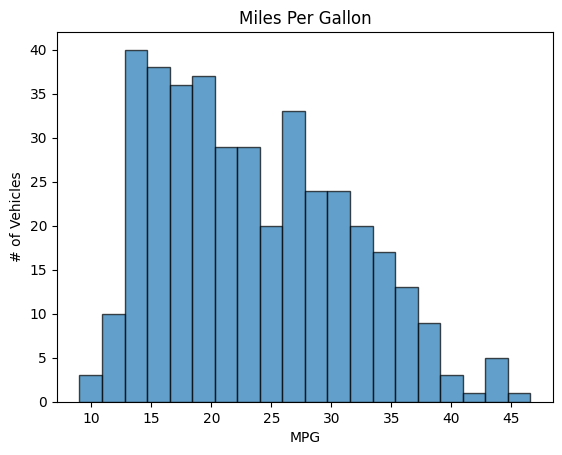

In [62]:
# Avg mpg
avg_mpg = df["mpg"].mean()
avg_mpg = round(avg_mpg, 1)
# Range (Max - Min)
range_mpg = np.ptp(df["mpg"])
range_mpg = round(range_mpg, 1)
# Variance
variance_mpg = np.var(df["mpg"])
variance_mpg = round(variance_mpg, 1)
# Standard Deviation
std_deviation_mpg = np.std(df["mpg"])
std_deviation_mpg = round(std_deviation_mpg, 1)

# Histogram of mpg values
plt.hist(df['mpg'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Miles Per Gallon')
plt.xlabel('MPG')
plt.ylabel('# of Vehicles')

# Print results
print(f"Average mpg: {avg_mpg}")
print(f"Range: {range_mpg}")
print(f"Variance: {variance_mpg}")
print(f"Standard Deviation: {std_deviation_mpg}")


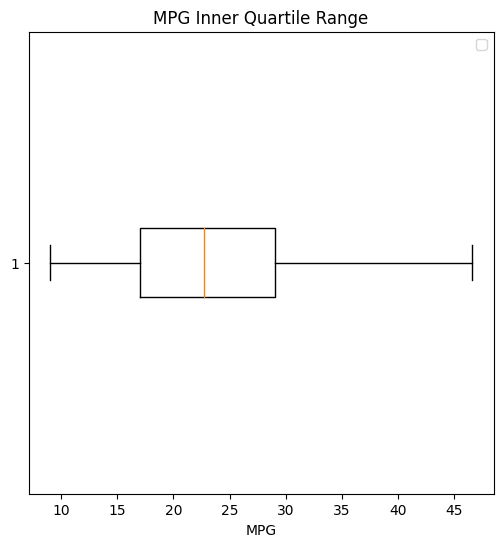

In [63]:
# Create a boxplot for MPG IQR
plt.figure(figsize=(6, 6))
plt.boxplot(df['mpg'], vert=False)

# Plot legend
plt.xlabel('MPG')
plt.title('MPG Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

Average acceleration: 15.5
Range: 16.8
Variance: 7.6
Standard Deviation: 2.8


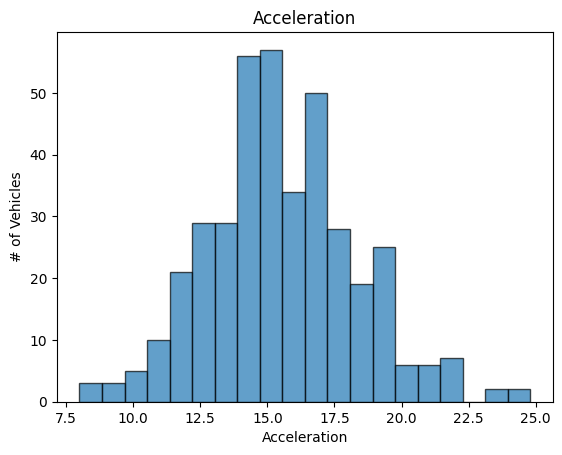

In [64]:
# Avg acceleration
avg_acceleration = df["acceleration"].mean()
avg_acceleration = round(avg_acceleration, 1)
# Range (Max - Min)
range_acceleration = np.ptp(df["acceleration"])
range_acceleration = round(range_acceleration, 1)
# Variance
variance_acceleration = np.var(df["acceleration"])
variance_acceleration = round(variance_acceleration, 1)
# Standard Deviation
std_deviation_acceleration = np.std(df["acceleration"])
std_deviation_acceleration = round(std_deviation_acceleration, 1)

# Histogram of acceleration values
plt.hist(df['acceleration'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('# of Vehicles')

# Print results
print(f"Average acceleration: {avg_acceleration}")
print(f"Range: {range_acceleration}")
print(f"Variance: {variance_acceleration}")
print(f"Standard Deviation: {std_deviation_acceleration}")

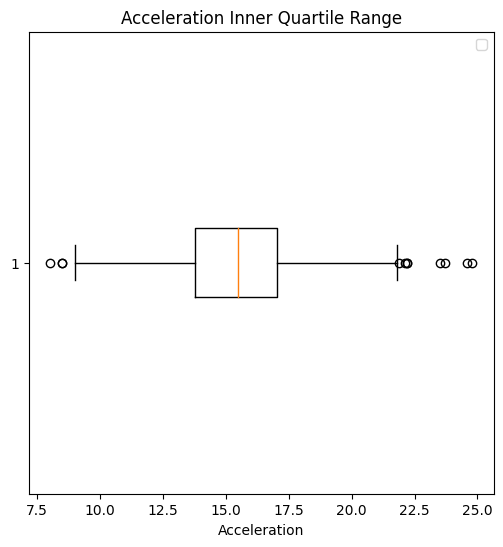

In [65]:
# Create a boxplot for acceleration
plt.figure(figsize=(6, 6))
plt.boxplot(df['acceleration'], vert=False)

# Plot legend
plt.xlabel('Acceleration')
plt.title('Acceleration Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

Average weight: 2977.6
Range: 3527
Variance: 719644.2
Standard Deviation: 848.3


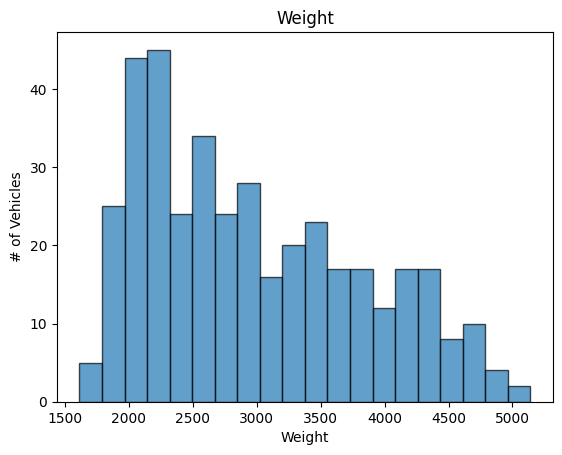

In [66]:
# Avg weight
avg_weight = df["weight"].mean()
avg_weight = round(avg_weight, 1)
# Range (Max - Min)
range_weight = np.ptp(df["weight"])
range_weight = round(range_weight, 1)
# Variance
variance_weight = np.var(df["weight"])
variance_weight = round(variance_weight, 1)
# Standard Deviation
std_deviation_weight = np.std(df["weight"])
std_deviation_weight = round(std_deviation_weight, 1)

# Histogram of weight values
plt.hist(df['weight'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Weight')
plt.xlabel('Weight')
plt.ylabel('# of Vehicles')

# Print results
print(f"Average weight: {avg_weight}")
print(f"Range: {range_weight}")
print(f"Variance: {variance_weight}")
print(f"Standard Deviation: {std_deviation_weight}")

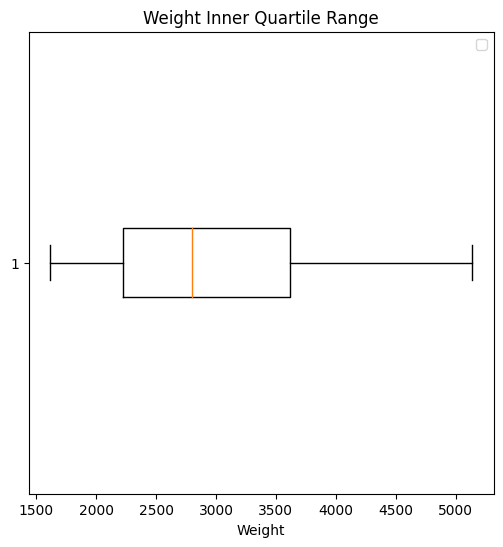

In [67]:
# Create a boxplot for weight
plt.figure(figsize=(6, 6))
plt.boxplot(df['weight'], vert=False)

# Plot legend
plt.xlabel('Weight')
plt.title('Weight Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

Average displacement: 194.4
Range: 387.0
Variance: 10950.4
Standard Deviation: 104.6


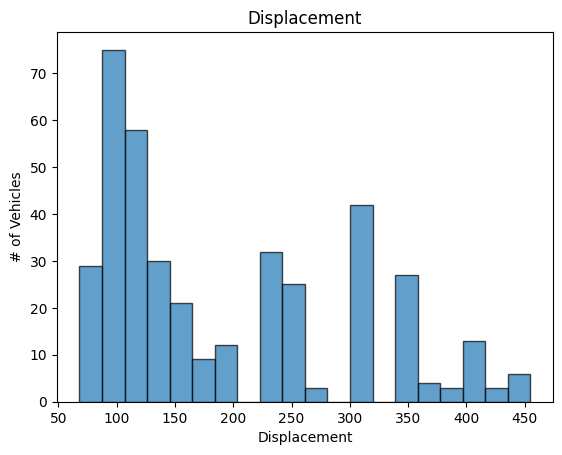

In [68]:
# Avg displacement
avg_displacement = df["displacement"].mean()
avg_displacement = round(avg_displacement, 1)
# Range (Max - Min)
range_displacement = np.ptp(df["displacement"])
range_displacement = round(range_displacement, 1)
# Variance
variance_displacement = df['displacement'].var()
variance_displacement = round(variance_displacement, 1)
# Standard Deviation
std_deviation_displacement = df["displacement"].std()
std_deviation_displacement = round(std_deviation_displacement, 1)

# Histogram of displacement values
plt.hist(df['displacement'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Displacement')
plt.xlabel('Displacement')
plt.ylabel('# of Vehicles')

# Print results
print(f"Average displacement: {avg_displacement}")
print(f"Range: {range_displacement}")
print(f"Variance: {variance_displacement}")
print(f"Standard Deviation: {std_deviation_displacement}")

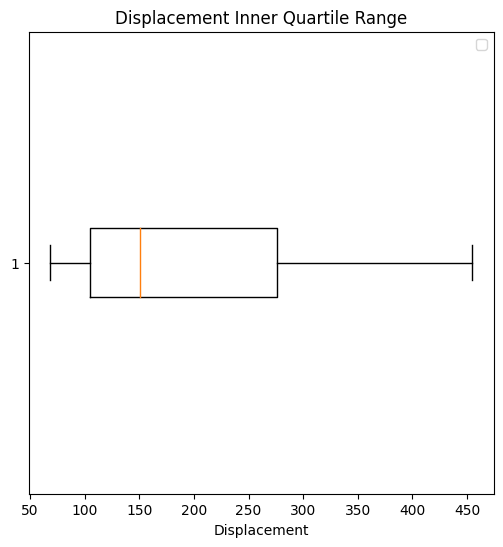

In [69]:
# Create a boxplot for displacement
plt.figure(figsize=(6, 6))
plt.boxplot(df['displacement'], vert=False)

# Plot legend
plt.xlabel('Displacement')
plt.title('Displacement Inner Quartile Range')
plt.legend()

# Show the plot
plt.show()

Text(0, 0.5, '# of Vehicles')

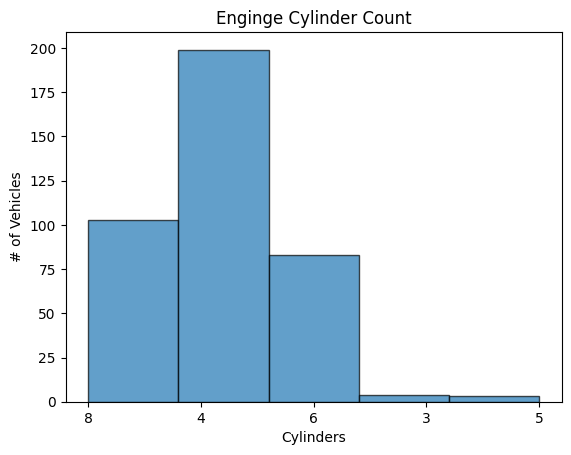

In [70]:
# Histogram of engine cylinder count
plt.hist(df['cylinders'], bins=5, edgecolor='black', alpha=0.7,)
plt.title(f'Enginge Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('# of Vehicles')

Text(0, 0.5, '# of Vehicles')

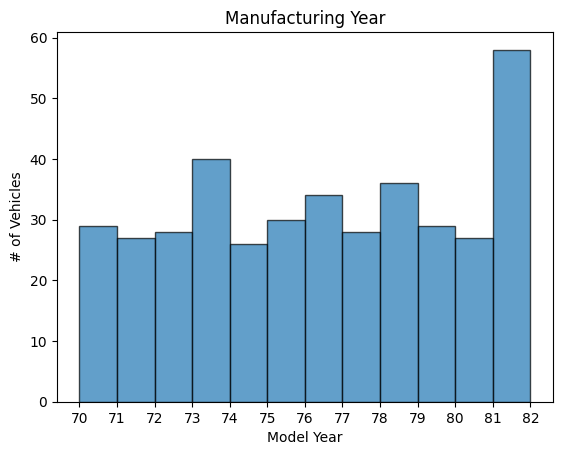

In [71]:
# Histogram of manufacturing years
plt.hist(df['model year'], bins=12, edgecolor='black', alpha=0.7)
plt.title(f'Manufacturing Year')
plt.xlabel('Model Year')
plt.ylabel('# of Vehicles')

([<matplotlib.axis.XTick at 0x7b181c2db130>,
 [Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200'),
  Text(250, 0, '250')])

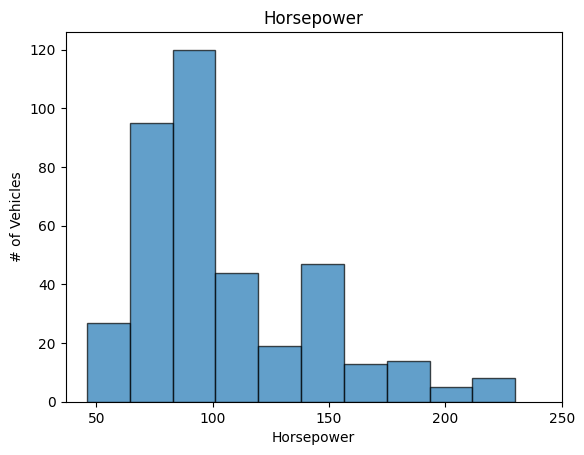

In [72]:
# Histogram of horsepower values
plt.hist(df['horsepower'], bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('# of Vehicles')
plt.xticks([50, 100, 150, 200, 250], ['50', '100', '150', '200', '250'])



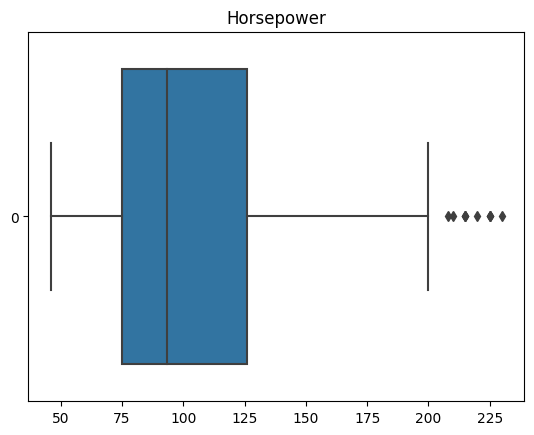

In [73]:
# Boxplot of horsepower
sns.boxplot(data=df['horsepower'], orient='h')
plt.title('Horsepower')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.5% of the points cannot be place

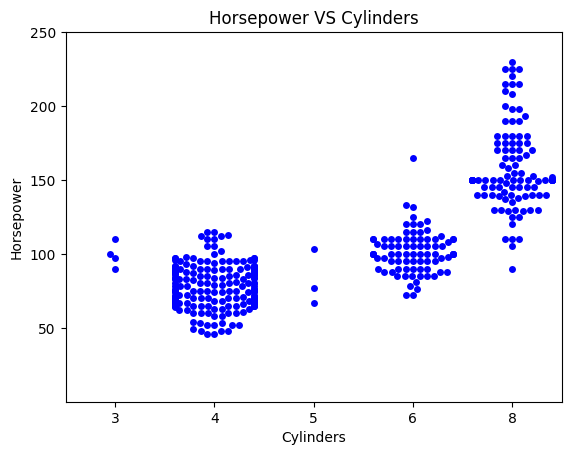

In [74]:
# Swarm plot comparing cyl
sns.swarmplot(x='cylinders', y='horsepower', data=df, color='blue', order=[3, 4, 5, 6, 8])

# Plot legend
plt.xlabel('Cylinders')
plt.ylabel('Horsepower')
plt.title('Horsepower VS Cylinders')
plt.yticks([50, 100, 150, 200, 250], ['50', '100', '150', '200', '250'])
plt.ylim(0, 250)
plt.show()

**Observations:________** Most data is skewed right, which fits with the automobile industry's trend of prioritizing smaller vehicles (Particularly during the 70's, which is when most of these vehicles were manufactured). There are some larger vehicles that have larger, higher horsepower engines with more cylinders, but this doesn't result in faster acceleration. The more powerful engines must have been used to accomodate the vehicles' sizes and not to produce sporier, faster vehicles.

### **Scaling the data**

In [75]:
# Create a scaler variable for all conversions
# All variables will be convereted to minmax scaler
scaler = MinMaxScaler()

# Assign all numeric columns in the dataframe to the variable 'numeric_columns'
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Process the numeric columns with the scaler
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])



## **Principal Component Analysis**

In [76]:
# Find the top 3 PCA coefficients
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(df[numeric_columns])
top_3_pca_coefficients = pca.components_

In [77]:
# Print the top 3 PCA coefficients
original_column_names = df.columns.tolist()
top_3_pca_column_names = [f'Top PCA {i+1}' for i in range(3)]
for i, column_name in enumerate(top_3_pca_column_names):
    print(f"{column_name}: {original_column_names[np.argmax(np.abs(top_3_pca_coefficients[i]))]}")

Top PCA 1: cylinders
Top PCA 2: weight
Top PCA 3: mpg


**Observations:___________________** The 3 variables that have the most impact on the principle component are: cylinder count, horsepower, and mpg, in that order. So, in general, the distinguishing variable when classifying vehicles is engine power/efficiency, with an  emphasis on engine power.

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

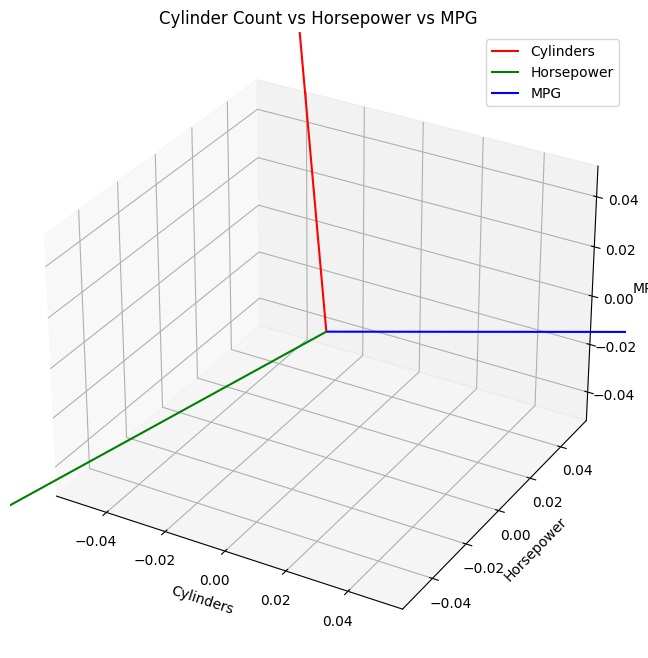

In [78]:
# Plot the top 3 principle components on a 3D graph

# Assign the PCA coefficients to a variable
top_3_pca_coefficients = pca.components_

# Assign column names and line colors
column_names = ['Cylinders', 'Horsepower', 'MPG']
line_colors = ['red', 'green', 'blue']

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the coefficients as vectors
for i in range(3):
    ax.quiver(0, 0, 0, top_3_pca_coefficients[i, 0], top_3_pca_coefficients[i, 1], top_3_pca_coefficients[i, 2],
              label=column_names[i], color=line_colors[i])

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
ax.legend()

# Show the plot
plt.title('Cylinder Count vs Horsepower vs MPG')
plt.show()

**Observations:__________________**There's a strong collinearity between cylinders and horsepower. Which makes sense given that they both are related to engine power. Miles per gallon has an opposite given that improved fuel performance is generally associated with less powerful engines.

#### **Visualize the data in 2 dimensions using the first two principal components**



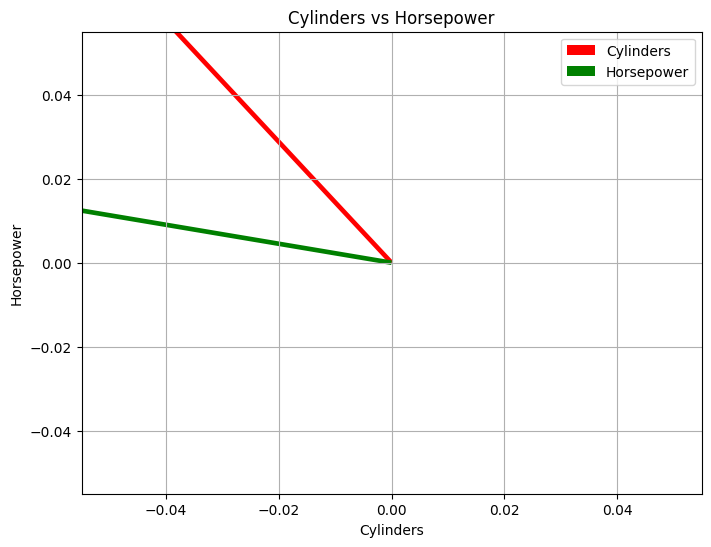

In [79]:
# Plot the top 2 principle components on a 2D graph

# Assign the PCA coefficients to a variable
top_2_pca_coefficients = pca.components_[:2]

# Assign column names and line colors
column_names = ['Cylinders', 'Horsepower']
line_colors = ['red', 'green']

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the coefficients as vectors
for i in range(2):
    ax.quiver(0, 0, top_2_pca_coefficients[i, 0], top_2_pca_coefficients[i, 1],
              angles='xy', scale_units='xy', scale=1, label=column_names[i], color=line_colors[i])

# Plot the legend
plt.title('Cylinders vs Horsepower')
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.legend()
plt.grid()

# Show the plot
plt.show()


**Observations:___________**Cylinders has a strong negative impact on component 1, while it has a strong positive impact on component 2. Horsepower has a much slighter positive impact on both components.

## **t-SNE**

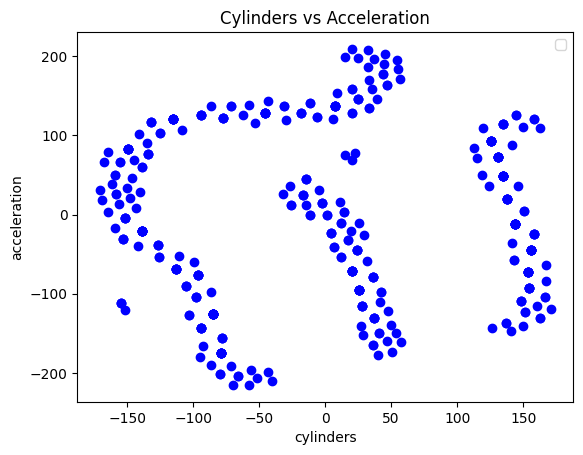

In [80]:
#Plot a TSNE graph of cylinders vs acceleration

# Select the two variables for t-SNE visualization
column_names = ['cylinders', 'acceleration']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Cylinders vs Acceleration')

# Show the plot
plt.legend()
plt.show()


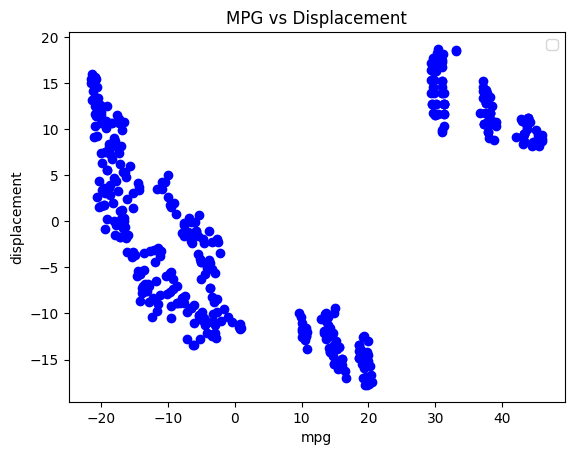

In [81]:
# Plot a TSNE graph of MPG vs displacement

# Select the two variables for t-SNE visualization
column_names = ['mpg', 'displacement']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('MPG vs Displacement')

# Show the plot
plt.legend()
plt.show()

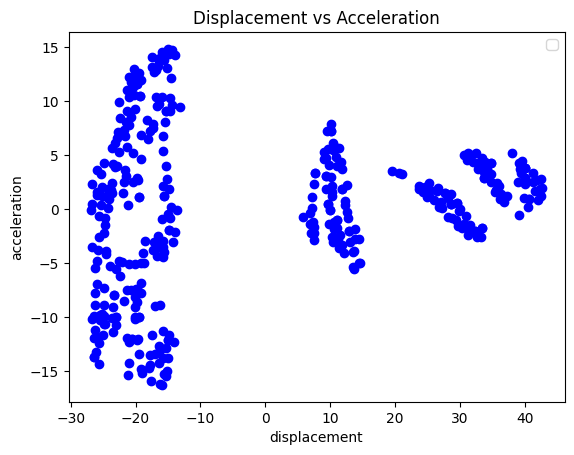

In [82]:
#Plot a TSNE graph of displacement vs acceleration

# Select the two variables for t-SNE visualization
column_names = ['displacement', 'acceleration']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Displacement vs Acceleration')

# Show the plot
plt.legend()
plt.show()


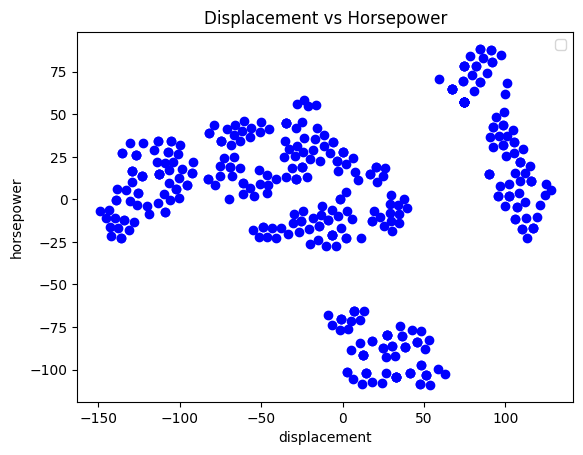

In [83]:
#Plot a TSNE graph of displacement vs horsepower

# Select the two variables for t-SNE visualization
column_names = ['displacement', 'horsepower']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Displacement vs Horsepower')

# Show the plot
plt.legend()
plt.show()


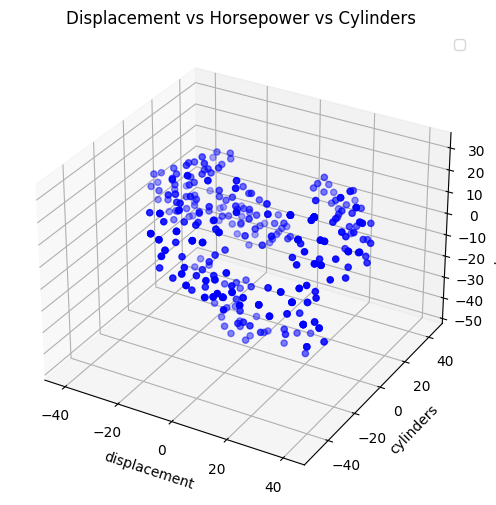

In [84]:
# Plot a TSNE graph of displacement vs horsepower vs cylinders

# Select the three variables for t-SNE visualization
column_names = ['displacement', 'cylinders', 'horsepower']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot with the three dimensions
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c='b', marker='o')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('Displacement vs Horsepower vs Cylinders')

# Show the plot
plt.legend()
plt.show()


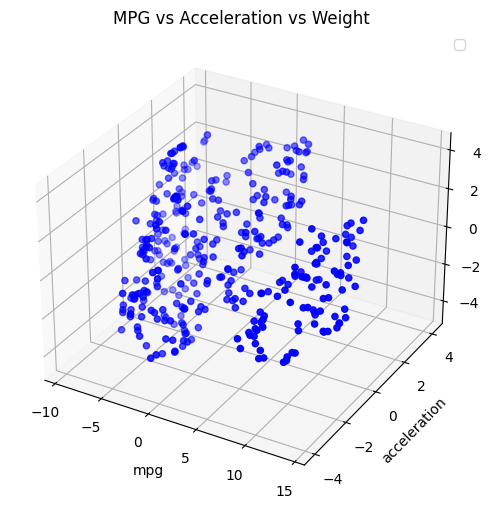

In [85]:
#Plot a TSNE graph of MPG vs Acceleration vs Weight

# Select the three variables for t-SNE visualization
column_names = ['mpg', 'acceleration', 'weight']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot with the three dimensions
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c='b', marker='o')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('MPG vs Acceleration vs Weight')

# Show the plot
plt.legend()
plt.show()


**Observations:______________** Vehicles with smaller engines have the widest range of acceleration speeds. As the engine size increases, the acceleration rate gets closer to the middle range of scores. Smaller engines also have the widest variety of fuel efficiency. And as the engine size increases the MPG tends to increase, particularly with the largest engines. Cylinder count also seems to have little affect on acceleration. 8 cylinder vehicles have only moderate acceleration rates, while 4 cylinder vehicles have some of the highest and lowest acceleration rates of the dataset. This backs up the findings of the EDA.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

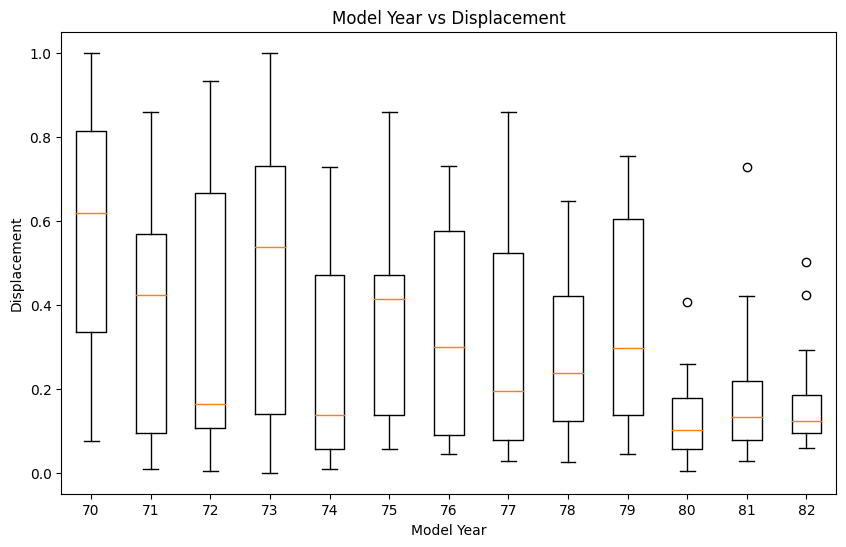

In [86]:
#Plot a boxplot measuring displacement by model year

# Sort the data by the categorical column
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['displacement'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('Displacement')
plt.title('Model Year vs Displacement')

# Show the plot
plt.show()



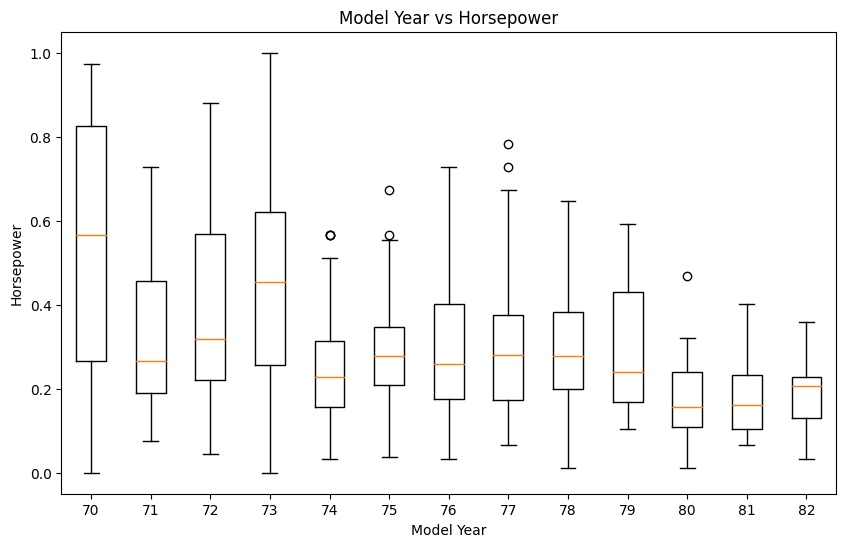

In [87]:
#Plot a boxplot measuring horsepower by model year

# Sort the data by the categorical column 'model year'
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['horsepower'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('Horsepower')
plt.title('Model Year vs Horsepower')

# Show the plot
plt.show()


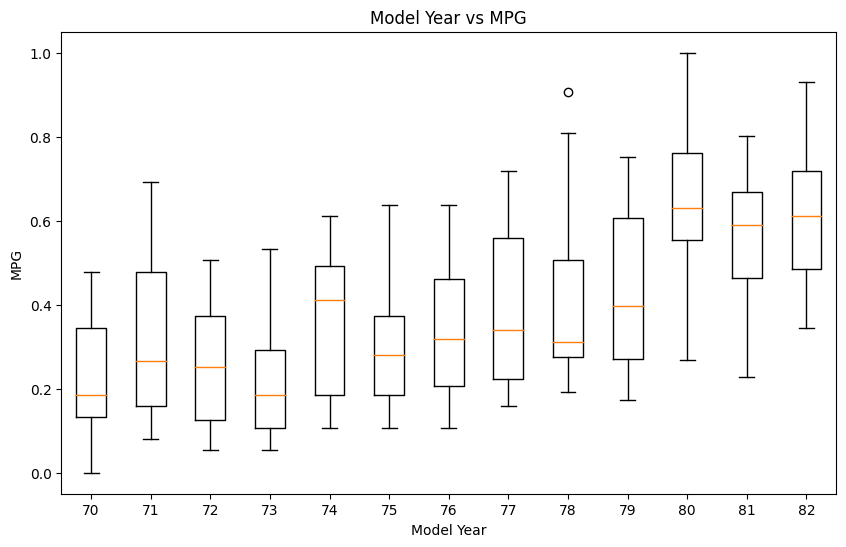

In [88]:
#Plot a boxplot measuring mpg by model year

# Sort the data by the categorical column
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['mpg'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Model Year vs MPG')

# Show the plot
plt.show()

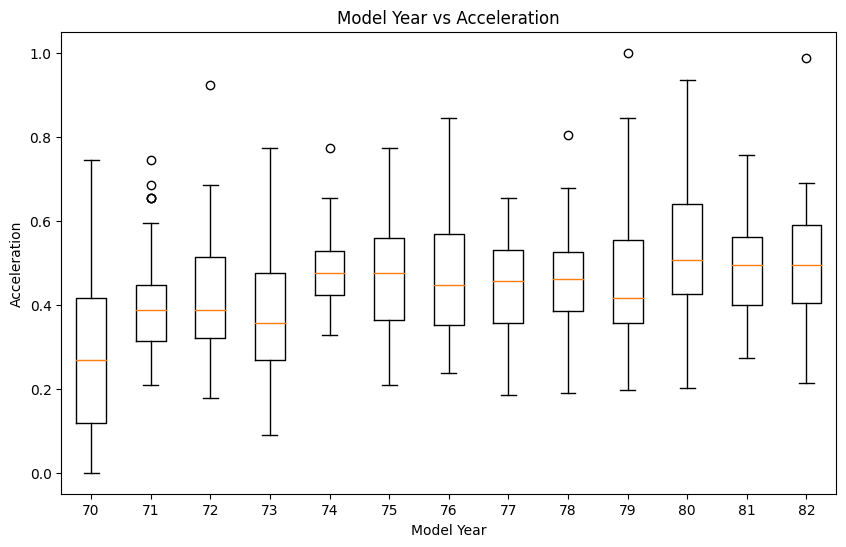

In [89]:
#Plot a boxplot measuring acceleration by model year

# Sort the data by the categorical column
sorted_year = df.sort_values(by='model year')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['acceleration'].values for _, group in sorted_year.groupby('model year')],
            labels=sorted_year['model year'].unique())

# Plot legend
plt.xlabel('Model Year')
plt.ylabel('Acceleration')
plt.title('Model Year vs Acceleration')

# Show the plot
plt.show()

In [90]:
# Create a list of the 5 most common car manufacturers

# Calculate the frequency of each value in the 'manufacturer' column
value_counts = df['manufacturer'].value_counts()

# Get the 5 most frequent values (manufacturers)
top_5_manufacturers = value_counts.head(5).index.tolist()

# Print list
print(f'The 5 most common car manufacturers are: {top_5_manufacturers}')

The 5 most common car manufacturers are: ['ford', 'chevrolet', 'plymouth', 'dodge', 'amc']


In [91]:
# Make a copy of the original dataframe and filter it to only include the 5 most common manufacturers
filtered_df = df[df['manufacturer'].isin(top_5_manufacturers)]

In [92]:
#Check the new dataframe
filtered_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,manufacturer
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,chevrolet chevelle malibu,chevrolet
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,plymouth satellite,plymouth
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,amc rebel sst,amc
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,ford torino,ford
5,0.159574,8,0.932817,0.826087,0.773462,0.119048,70,ford galaxie 500,ford


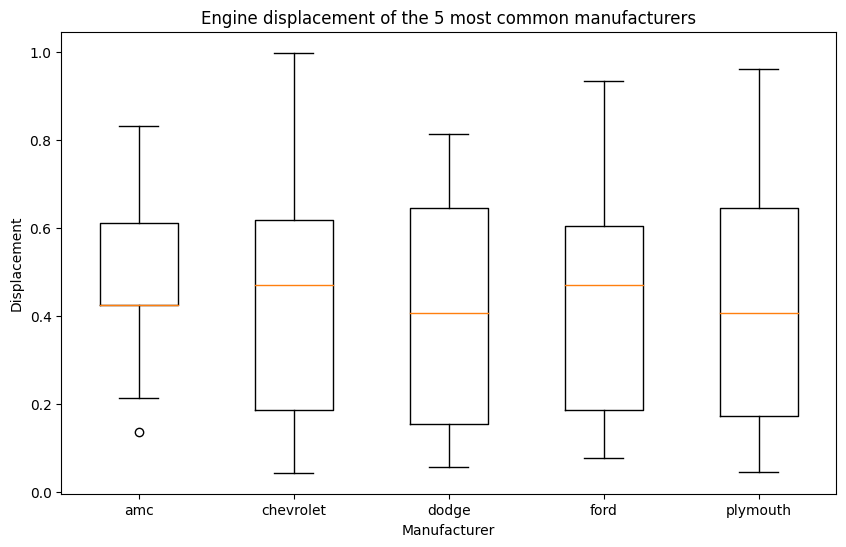

In [93]:
# Plot a boxplot measuring displacement by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['displacement'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.title('Engine displacement of the 5 most common manufacturers')

# Show the plot
plt.show()


<ipython-input-94-edd4e0ce2dbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['horsepower'] = pd.to_numeric(filtered_df['horsepower'], errors='coerce')


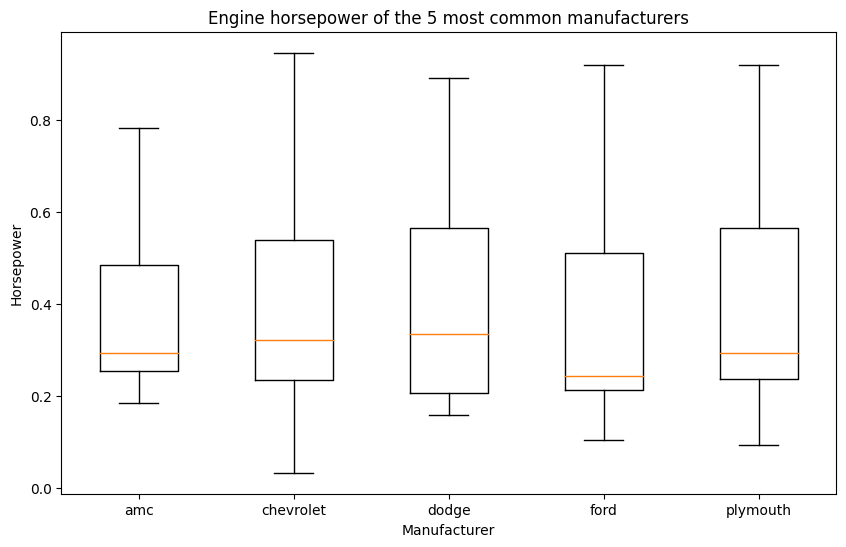

In [94]:
#Plot a boxplot measuring horsepower by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Convert 'horsepower' column to numeric, coerce errors to NaN
filtered_df['horsepower'] = pd.to_numeric(filtered_df['horsepower'], errors='coerce')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['horsepower'].dropna().values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Horsepower')
plt.title('Engine horsepower of the 5 most common manufacturers')

# Show the plot
plt.show()


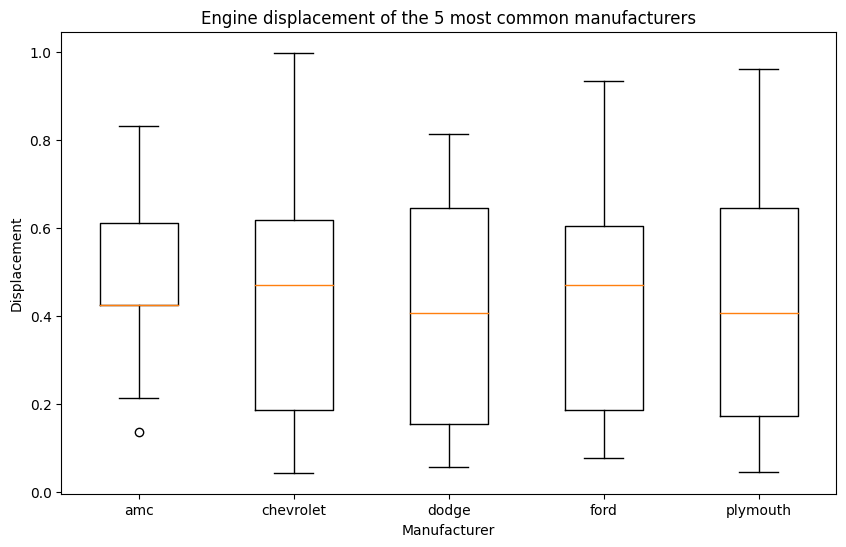

In [95]:
# Plot a boxplot measuring displacement by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['displacement'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.title('Engine displacement of the 5 most common manufacturers')

# Show the plot
plt.show()


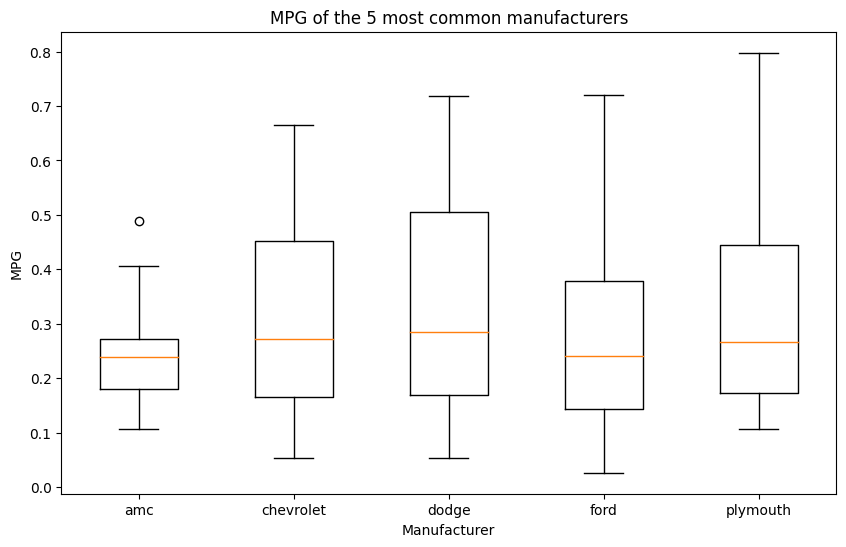

In [96]:
# Plot a boxplot measuring mpg by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['mpg'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('MPG')
plt.title('MPG of the 5 most common manufacturers')

# Show the plot
plt.show()


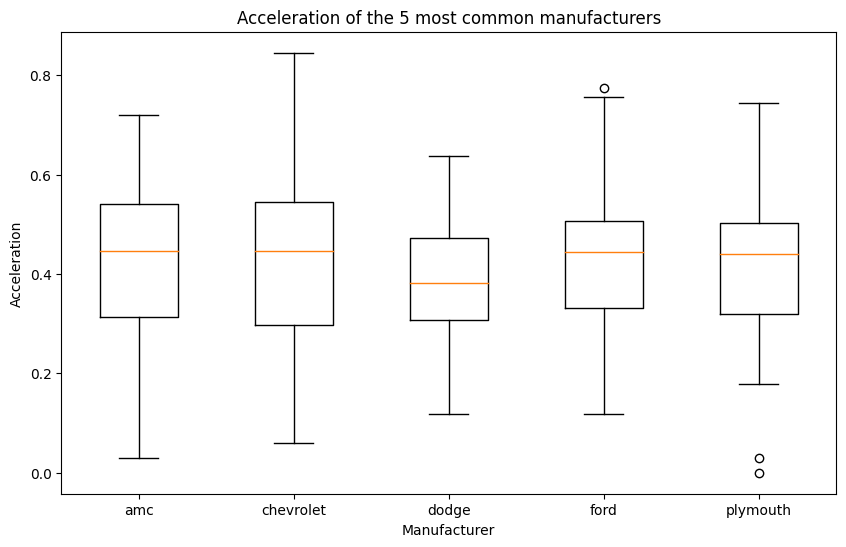

In [97]:
# Plot a boxplot measuring acceleration by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['acceleration'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Acceleration')
plt.title('Acceleration of the 5 most common manufacturers')

# Show the plot
plt.show()

**Observations:___________** The 5 most common manufacturers make very similar vehicles with regards to engine efficiency. Acceleration and MPG also increased gradually over time, while horsepower and displacement decreased.

## **Actionable Insights and Recommendations**

**write your insights and recommendations here:**  ______ I would advise categorizing the inventory based on fuel performance vs power. After learning what a customer wants, the dealership should be able to pinpoint which vehicles best suit their needs. The dealership should also take into account the change in focus from horsepower/engine displacement in the early 70's to fuel efficiency and MPG in the early 80's when trying to find the right vehicle for a customer. I would also recommend they avoid focusing on specific manufacturers unless the customer has a preference, since all manufacturers seem to have produced similar vehicles.